In [1]:
# Install required dependencies
!pip install -U ucimlrepo
!pip install optbinning

# Clone and install BRIO library from GitHub
!git clone https://github.com/MIRAI-Dev-team/Brio_library.git
import sys
import os
sys.path.insert(0, os.path.abspath('Brio_library/brio'))

# Verify BRIO library installation
try:
    from brio.risk.HazardFromBiasDetectionCalculator import HazardFromBiasDetectionCalculator
    from brio.risk.RiskCalculator import RiskCalculator
    from brio.bias.FreqVsFreqBiasDetector import FreqVsFreqBiasDetector
    print("✅ BRIO library imported successfully!")
except ImportError as e:
    print(f"❌ Error importing BRIO: {e}")
    print("Trying alternative import method...")

    # Alternative import method
    import importlib.util
    import tempfile
    import requests

    # Manually download required BRIO files
    brio_files = [
        "risk/HazardFromBiasDetectionCalculator.py",
        "risk/RiskCalculator.py",
        "bias/FreqVsFreqBiasDetector.py"
    ]

    base_url = "https://raw.githubusercontent.com/MIRAI-Dev-team/Brio_library/main/brio/"

    for file_path in brio_files:
        url = base_url + file_path
        response = requests.get(url)
        if response.status_code == 200:
            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(file_path), exist_ok=True)
            with open(file_path, 'w') as f:
                f.write(response.text)
            print(f"Downloaded {file_path}")
        else:
            print(f"Failed to download {file_path}")

    # Try importing again
    try:
        from risk.HazardFromBiasDetectionCalculator import HazardFromBiasDetectionCalculator
        from risk.RiskCalculator import RiskCalculator
        from bias.FreqVsFreqBiasDetector import FreqVsFreqBiasDetector
        print("✅ BRIO library imported successfully after manual download!")
    except ImportError as e:
        print(f"❌ Still cannot import BRIO: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.


Cloning into 'Brio_library'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 52 (delta 9), reused 50 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 48.89 KiB | 3.49 MiB/s, done.
Resolving deltas: 100% (9/9), done.
❌ Error importing BRIO: No module named 'brio'
Trying alternative import method...
Downloaded risk/HazardFromBiasDetectionCalculator.py
Downloaded risk/RiskCalculator.py
Downloaded bias/FreqVsFreqBiasDetector.py
✅ BRIO library imported successfully after manual download!


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from optbinning import BinningProcess, Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', message='.*force_all_finite.*')
warnings.filterwarnings('ignore', category=RuntimeWarning, module='scipy.spatial.distance')

In [3]:
# Fetch German Credit dataset from UCI repository
statlog_german_credit_data = fetch_ucirepo(id=144)

# Extract features and targets
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets
df_german = X
df_german['performance'] = y

# Define mapping dictionaries for categorical variables
attribute1_dic = {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4}
attribute3_dic = {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
attribute4_dic = {'A40': 0, 'A41': 1, 'A42': 2, 'A43': 3, 'A44': 4, 'A45': 5, 'A46': 6, 'A47': 7, 'A48': 8, 'A49': 9, 'A410': 10}
attribute6_dic = {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5}
attribute7_dic = {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}
attribute9_dic = {'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4, 'A95': 5}
attribute10_dic = {'A101': 1, 'A102': 2, 'A103': 3}
attribute12_dic = {'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4}
attribute14_dic = {'A141': 1, 'A142': 2, 'A143': 3}
attribute15_dic = {'A151': 1, 'A152': 2, 'A153': 3}
attribute17_dic = {'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4}
attribute19_dic = {'A191': 1, 'A192': 2}
attribute20_dic = {'A201': 1, 'A202': 2}
performance_dic = {1: 0, 2: 1}

# Create numerical dataframe
df_num = pd.DataFrame()
df_num['Attribute1'] = df_german['Attribute1'].map(attribute1_dic)
df_num['Attribute2'] = df_german['Attribute2']
df_num['Attribute3'] = df_german['Attribute3'].map(attribute3_dic)
df_num['Attribute4'] = df_german['Attribute4'].map(attribute4_dic)
df_num['Attribute5'] = df_german['Attribute5']
df_num['Attribute6'] = df_german['Attribute6'].map(attribute6_dic)
df_num['Attribute7'] = df_german['Attribute7'].map(attribute7_dic)
df_num['Attribute8'] = df_german['Attribute8']
df_num['Attribute9'] = df_german['Attribute9'].map(attribute9_dic)
df_num['Attribute10'] = df_german['Attribute10'].map(attribute10_dic)
df_num['Attribute11'] = df_german['Attribute11']
df_num['Attribute12'] = df_german['Attribute12'].map(attribute12_dic)
df_num['Attribute13'] = df_german['Attribute13']
df_num['Attribute14'] = df_german['Attribute14'].map(attribute14_dic)
df_num['Attribute15'] = df_german['Attribute15'].map(attribute15_dic)
df_num['Attribute16'] = df_german['Attribute16']
df_num['Attribute17'] = df_german['Attribute17'].map(attribute17_dic)
df_num['Attribute18'] = df_german['Attribute18']
df_num['Attribute19'] = df_german['Attribute19'].map(attribute19_dic)
df_num['Attribute20'] = df_german['Attribute20'].map(attribute20_dic)
df_num['performance'] = df_german['performance'].map(performance_dic)

# Create age groups
df_num['age_group'] = pd.cut(df_num["Attribute13"],
       bins=[0, 27, 37, 47, 200],
       labels=[1, 2, 3, 4]).astype('int64')

# Create gender and personal status variables
gender_dic = {1: 1, 2: 2, 3: 1, 4: 1, 5: 2}
personal_status_dic = {1: 2, 2: 2, 3: 1, 4: 2}

df_num['gender'] = df_num['Attribute9'].map(gender_dic)
df_num['personal_status'] = df_num['Attribute9'].map(personal_status_dic)

# Get variable names for binning process
variable_names = list(df_german.columns[0:-1])

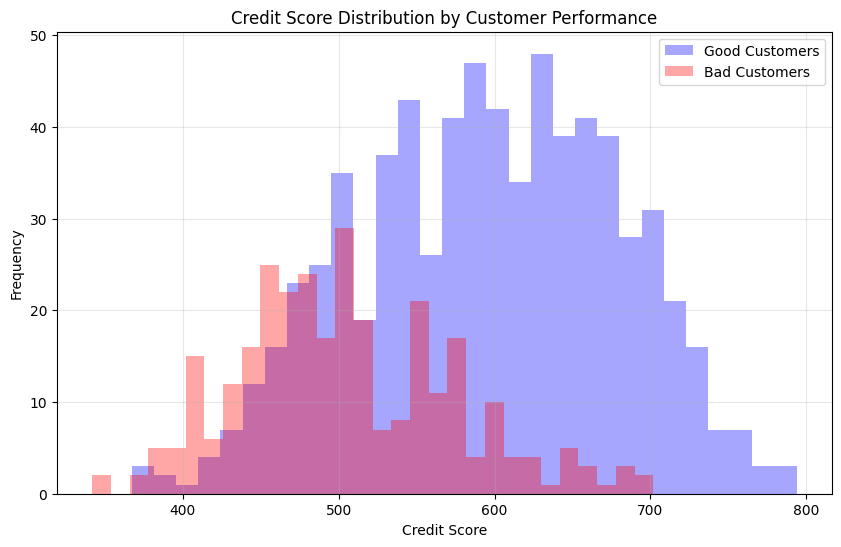

Final dataset shape: (1000, 26)


In [4]:
# Define selection criteria for binning process
selection_criteria = {
    "iv": {"min": 0.02, "max": 1},
    "quality_score": {"min": 0.01}
}

# Initialize binning process
binning_process = BinningProcess(
    variable_names,
    selection_criteria=selection_criteria
)

# Configure logistic regression estimator
estimator = LogisticRegression(solver="lbfgs")

# Create scorecard object
scorecard = Scorecard(
    binning_process=binning_process,
    estimator=estimator,
    scaling_method="min_max",
    scaling_method_params={"min": 300, "max": 850}
)

# Prepare target and feature data
y = df_num['performance'].values
X = df_num[variable_names]

# Fit the scorecard model
scorecard.fit(X, y, show_digits=4)

# Generate and export scorecard table
df_scorecard = pd.DataFrame(scorecard.table(style='summary'))
df_scorecard.to_csv('binning.csv', index=False)

# Calculate credit scores
score = scorecard.score(X)

# Visualize score distribution
mask = y == 0
plt.figure(figsize=(10, 6))
plt.hist(score[mask], bins=30, label="Good Customers", color="b", alpha=0.35)
plt.hist(score[~mask], bins=30, label="Bad Customers", color="r", alpha=0.35)
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Credit Score Distribution by Customer Performance")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Add scores to dataframe
df_num['score'] = score
df_num["score_bin"] = (df_num["score"] <= 550).astype(int)

# Create final clean dataset
df = df_num.dropna(subset="performance").copy()
print(f"Final dataset shape: {df.shape}")

In [5]:
# Feature engineering for fairness and revenue analysis

# Performance target variable
df["perf"] = df["performance"]
df["perf_bin"] = df["perf"].map({0: "good", 1: "bad"})

# Age binning for fairness analysis
bin_eta_cliente = [0, 27, 37, 47, 200]
bin_eta_cliente_labels = ["{}. {}-{}".format(_i+1, bin_eta_cliente[_i], bin_eta_cliente[_i+1])
                         for _i in range(len(bin_eta_cliente)-2)]
bin_eta_cliente_labels.append("{}. >{}".format(len(bin_eta_cliente)-1, bin_eta_cliente[-2]))

df['age_bin'] = pd.cut(df["Attribute13"], bins=bin_eta_cliente, labels=bin_eta_cliente_labels)
df["age_bin_num"] = df["age_bin"].map({
    '3. 37-47': 3,
    '2. 27-37': 2,
    '1. 0-27': 1,
    '4. >47': 4
})

# Nationality attribute for fairness analysis
df['nationality'] = (df["Attribute20"] == 1).map({
    True: "Foreign",
    False: "Not Foreign"
})

# Gender attribute for fairness analysis
df['gender_bin'] = (df["gender"] == 1).map({
    True: "Male",
    False: "Female"
})

# Credit score segmentation for revenue analysis
score_threshold = 550
df["score2"] = (df["score"] <= score_threshold).astype(int)

# Create detailed score bins
score_classes_bin_cr = [0, 530, 550, 570, 590, 610, 630, 650, 670, 1000]
df["score_bin"] = pd.cut(
    df["score"],
    bins=score_classes_bin_cr,
    labels=["0", "530", "550", "570", "590", "610", "630", "650", "670"]
)
df["score_num"] = df["score"]

# Loan amount binning for revenue impact analysis
df["amount_financed_bin"], _bins = pd.cut(
    df["Attribute5"],
    bins=np.arange(50, 1550, 100),
    labels=np.arange(50+50, 1550-50, 100),
    retbins=True
)

# Interest rate for revenue calculations
df['interest_rate'] = df['Attribute8'] / 100

# Export processed dataset
df.to_csv('processed_credit_data_with_features.csv', index=False)
print(f"Exported dataset with {len(df)} rows and {len(df.columns)} columns")

Exported dataset with 1000 rows and 36 columns


In [6]:
# Initialize BRIO components for fairness analysis
rc = RiskCalculator()
hc = HazardFromBiasDetectionCalculator()
bd = FreqVsFreqBiasDetector(distance="JS", A1="high")

# Define conditioning variables for comprehensive fairness analysis
conditioning_variable_list = ['Attribute1', 'Attribute3', 'Attribute6',
                             'Attribute10', 'Attribute12', 'Attribute14']

In [7]:
# Model fairness analysis with BRIO

# Gender fairness analysis
JSro_gender = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='gender'
)

JSc_gender = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='gender',
    conditioning_variables=conditioning_variable_list
)

hazard_gender_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_gender, JSc_gender, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Age group fairness analysis
JSro_age = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='age_group'
)

JSc_age = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='age_group',
    conditioning_variables=conditioning_variable_list
)

hazard_age_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_age, JSc_age, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Nationality fairness analysis
JSro_nationality = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='Attribute20'
)

JSc_nationality = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='score_bin',
    root_variable='Attribute20',
    conditioning_variables=conditioning_variable_list
)

hazard_nationality_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_nationality, JSc_nationality, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Individual fairness analysis for gender
hazard_gender_individual = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_gender, JSc_gender, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

# Individual fairness analysis for age group
hazard_age_individual = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_age, JSc_age, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

# Individual fairness analysis for nationality
hazard_nationality_individual = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_nationality, JSc_nationality, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

In [8]:
# Data fairness analysis with BRIO

# Gender fairness analysis on actual performance data
JSro_gender_data = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='gender'
)

JSc_gender_data = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='gender',
    conditioning_variables=conditioning_variable_list
)

hazard_gender_group_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_gender_data, JSc_gender_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Age group fairness analysis on actual performance data
JSro_age_data = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='age_group'
)

JSc_age_data = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='age_group',
    conditioning_variables=conditioning_variable_list
)

hazard_age_group_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_age_data, JSc_age_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Nationality fairness analysis on actual performance data
JSro_nationality_data = bd.compare_root_variable_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='Attribute20'
)

JSc_nationality_data = bd.compare_root_variable_conditioned_groups(
    dataframe=df_num,
    target_variable='performance',
    root_variable='Attribute20',
    conditioning_variables=conditioning_variable_list
)

hazard_nationality_group_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_nationality_data, JSc_nationality_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="group"
)

# Individual fairness analysis for gender on actual performance data
hazard_gender_individual_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_gender_data, JSc_gender_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

# Individual fairness analysis for age group on actual performance data
hazard_age_individual_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_age_data, JSc_age_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

# Individual fairness analysis for nationality on actual performance data
hazard_nationality_individual_data = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
    JSro_nationality_data, JSc_nationality_data, df_num.shape[0],
    conditioning_variable_list, weight_logic="individual"
)

In [9]:
# Calculate and display risk metrics
print(f"=== MODEL ===")
print(f"Group fairness")
print(f"    Gender hazard: {hazard_gender_group[0]:.4f} ( {hazard_gender_group[0]/hazard_gender_group[-1]*100:.4f} % )")
print(f"    Age hazard: {hazard_age_group[0]:.4f} ( {hazard_age_group[0]/hazard_age_group[-1]*100:.4f} % )")
print(f"    Nationality hazard: {hazard_nationality_group[0]:.4f} ( {hazard_nationality_group[0]/hazard_nationality_group[-1]*100:.4f} % )")
print()
print(f"Individual fairness")
print(f"    Gender hazard: {hazard_gender_individual[0]:.4f} ( {hazard_gender_individual[0]/hazard_gender_individual[-1]*100:.4f} % )")
print(f"    Age hazard: {hazard_age_individual[0]:.4f} ( {hazard_age_individual[0]/hazard_age_individual[-1]*100:.4f} % )")
print(f"    Nationality hazard: {hazard_nationality_individual[0]:.4f} ( {hazard_nationality_individual[0]/hazard_nationality_individual[-1]*100:.4f} % )")
print()

# Calculate total risk metrics
total_risk_model_group = ( hazard_gender_group[0] + hazard_age_group[0] + hazard_nationality_group[0]  ) / 3
total_risk_model_individual = ( hazard_gender_individual[0] + hazard_age_individual[0] + hazard_nationality_individual[0] ) / 3
mean_percentage_group = (hazard_gender_group[0]/hazard_gender_group[-1]*100 +
                        hazard_age_group[0]/hazard_age_group[-1]*100 +
                        hazard_nationality_group[0]/hazard_nationality_group[-1]*100) / 3

mean_percentage_individual = (hazard_gender_individual[0]/hazard_gender_individual[-1]*100 +
                             hazard_age_individual[0]/hazard_age_individual[-1]*100 +
                             hazard_nationality_individual[0]/hazard_nationality_individual[-1]*100) / 3
print(f"Total risk model group: {total_risk_model_group:.4f} ( {mean_percentage_group:.4f} % )")
print(f"Total risk model individual: {total_risk_model_individual:.4f}  ( {mean_percentage_individual:.4f} % )")
print()

# Display data risk metrics
print(f"=== DATA ===")
print(f"Group fairness")
print(f"    Gender hazard: {hazard_gender_group_data[0]:.4f} ( {hazard_gender_group_data[0]/hazard_gender_group_data[-1]*100:.4f} % )")
print(f"    Age hazard: {hazard_age_group_data[0]:.4f} ( {hazard_age_group_data[0]/hazard_age_group_data[-1]*100:.4f} % )")
print(f"    Nationality hazard: {hazard_nationality_group_data[0]:.4f} ( {hazard_nationality_group_data[0]/hazard_nationality_group_data[-1]*100:.4f} % )")
print()
print(f"Individual fairness")
print(f"    Gender hazard: {hazard_gender_individual_data[0]:.4f} ( {hazard_gender_individual_data[0]/hazard_gender_individual_data[-1]*100:.4f} % )")
print(f"    Age hazard: {hazard_age_individual_data[0]:.4f} ( {hazard_age_individual_data[0]/hazard_age_individual_data[-1]*100:.4f} % )")
print(f"    Nationality hazard: {hazard_nationality_individual_data[0]:.4f} ( {hazard_nationality_individual_data[0]/hazard_nationality_individual_data[-1]*100:.4f} % )")
print()

# Calculate total data risk metrics
total_risk_data_group = ( hazard_gender_group_data[0] + hazard_age_group_data[0] + hazard_nationality_group_data[0]  ) / 3
total_risk_data_individual = ( hazard_gender_individual_data[0] + hazard_age_individual_data[0] + hazard_nationality_individual_data[0] ) / 3
mean_percentage_group_data = (hazard_gender_group_data[0]/hazard_gender_group_data[-1]*100 +
                             hazard_age_group_data[0]/hazard_age_group_data[-1]*100 +
                             hazard_nationality_group_data[0]/hazard_nationality_group_data[-1]*100) / 3

mean_percentage_individual_data = (hazard_gender_individual_data[0]/hazard_gender_individual_data[-1]*100 +
                                  hazard_age_individual_data[0]/hazard_age_individual_data[-1]*100 +
                                  hazard_nationality_individual_data[0]/hazard_nationality_individual_data[-1]*100) / 3
print(f"Total risk data group: {total_risk_data_group:.4f} ( {mean_percentage_group_data:.4f} % )")
print(f"Total risk data individual: {total_risk_data_individual:.4f} ( {mean_percentage_individual_data:.4f} % )")
print()

# Compare model vs data risk metrics
print(f"=== COMPARISON ===")
print(f"Risk value change group: {(total_risk_model_group - total_risk_data_group ) / total_risk_data_group * 100:.4f} %")
print(f"Risk value change individual: {(total_risk_model_individual - total_risk_data_individual ) / total_risk_data_individual * 100:.4f} %")

=== MODEL ===
Group fairness
    Gender hazard: 0.0013 ( 23.8148 % )
    Age hazard: 0.0067 ( 96.4460 % )
    Nationality hazard: 0.0062 ( 72.2881 % )

Individual fairness
    Gender hazard: 0.0015 ( 37.7080 % )
    Age hazard: 0.0051 ( 96.2594 % )
    Nationality hazard: 0.0054 ( 81.0628 % )

Total risk model group: 0.0047 ( 64.1829 % )
Total risk model individual: 0.0040  ( 71.6767 % )

=== DATA ===
Group fairness
    Gender hazard: 0.0015 ( 27.6316 % )
    Age hazard: 0.0056 ( 93.5366 % )
    Nationality hazard: 0.0087 ( 92.5821 % )

Individual fairness
    Gender hazard: 0.0014 ( 36.2574 % )
    Age hazard: 0.0048 ( 95.2286 % )
    Nationality hazard: 0.0061 ( 92.9880 % )

Total risk data group: 0.0053 ( 71.2501 % )
Total risk data individual: 0.0041 ( 74.8246 % )

=== COMPARISON ===
Risk value change group: -10.0514 %
Risk value change individual: -1.9744 %


In [10]:
# Enhanced fairness vs profit analysis with integrated BRIO calculations
def get_fairness_vs_profit_with_integrated_brio(
        df,
        df_num,
        y_true_column,
        y_pred_class_column,
        amount_financed_column,
        interest_rate_column,
        conditioning_variable_list,
        bd, hc,
        expected_loss_percentage=0.15
):
    """
    Enhanced fairness vs profit analysis with BRIO fairness calculations
    for each score threshold.
    """
    results_df_dict = []
    fairness_tracker_array = []  # Array to store fairness_tracker for each threshold

    # Get actual unique score bins from data and sort them
    #classes = df[y_pred_class_column].unique()
    classes = df[y_pred_class_column].unique().sort_values()
    #classes = score_classes_bin_cr

    print(f"Analyzing {len(classes)} score thresholds with integrated BRIO fairness analysis...")

    # -----------------------------------------------------------------------------
    # ITERATE THROUGH EACH SCORE THRESHOLD WITH BRIO ANALYSIS
    # -----------------------------------------------------------------------------
    for _i, _class in enumerate(classes):
        print()
        print(f"\n--- Processing threshold {_i}/{len(classes)}: {_class} ---")
        print()

        _df = df.copy()
        _df_num_temp = df_num.copy()

        # Create binary approval decision: approve if score >= current threshold
        _df['_score'] = (np.logical_not(_df[y_pred_class_column].isin(classes[_i:]))).astype(int)

        # Apply the same threshold logic to df_num for BRIO analysis
        _df_num_temp['score_bin_temp'] =  (np.logical_not(_df['_score']))
        #_df_num_temp['score_bin_temp'] = (np.logical_not(_df_num_temp[y_pred_class_column].isin(classes[_i:]))).astype(int)
        #_df_num_temp['score_bin_temp'] = (_df_num_temp[y_pred_class_column].astype(float) <= float(_class)).astype(int)

        # Create masks for different customer segments
        mask_score_good = (_df['_score'] == 0)  # Approved customers (score >= threshold)
        mask_bad = (_df[y_true_column] == 1)    # Actually defaulted customers
        mask_good = (_df[y_true_column] == 0)   # Actually good customers

        #print("First 20 lines - side by side comparison:")
        #comparison_df = pd.DataFrame({
        #    'actual score': df['score'].head(20),
        #    'binned score (binary)': _df_num_temp['score_bin_temp'].head(20),
        #    'closest binned thr. below': _df[y_pred_class_column].head(20)
        #})
        #print(comparison_df)
        #print()

        # -----------------------------------------------------------------------------
        # FINANCIAL CALCULATIONS
        # -----------------------------------------------------------------------------
        tca = _df.loc[mask_score_good, amount_financed_column].sum()
        bad_rate = (mask_score_good & mask_bad).sum() / mask_score_good.count() if mask_score_good.sum() > 0 else 0
        revenues = (_df.loc[(mask_score_good & mask_good), amount_financed_column] *
                   _df.loc[(mask_score_good & mask_good), interest_rate_column]).sum()
        loss = _df.loc[(mask_score_good & mask_bad), amount_financed_column].sum() * expected_loss_percentage

        # Check data before BRIO analysis
        approved_count = (_df_num_temp['score_bin_temp'] == 1).sum()
        rejected_count = (_df_num_temp['score_bin_temp'] == 0).sum()
        print(f"  Approved: {approved_count}, Rejected: {rejected_count}")
        print()

        # -----------------------------------------------------------------------------
        # BRIO FAIRNESS CALCULATIONS FOR CURRENT THRESHOLD
        # -----------------------------------------------------------------------------
        print(f"  Computing BRIO fairness scores for threshold {_class}...")

        try:

            # GENDER FAIRNESS ANALYSIS
            JSro_gender = bd.compare_root_variable_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='gender'
            )

            JSc_gender = bd.compare_root_variable_conditioned_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='gender',
                conditioning_variables=conditioning_variable_list
            )

            hazard_gender_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
                JSro_gender, JSc_gender, _df_num_temp.shape[0],
                conditioning_variable_list, weight_logic="group"
            )

            # AGE GROUP FAIRNESS ANALYSIS
            JSro_age = bd.compare_root_variable_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='age_group'
            )

            JSc_age = bd.compare_root_variable_conditioned_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='age_group',
                conditioning_variables=conditioning_variable_list
            )

            hazard_age_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
                JSro_age, JSc_age, _df_num_temp.shape[0],
                conditioning_variable_list, weight_logic="group"
            )

            # NATIONALITY FAIRNESS ANALYSIS
            JSro_nationality = bd.compare_root_variable_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='Attribute20'
            )

            JSc_nationality = bd.compare_root_variable_conditioned_groups(
                dataframe=_df_num_temp,
                target_variable='score_bin_temp',
                root_variable='Attribute20',
                conditioning_variables=conditioning_variable_list
            )

            hazard_nationality_group = hc.compute_hazard_from_freqvsfreq_or_freqvsref(
                JSro_nationality, JSc_nationality, _df_num_temp.shape[0],
                conditioning_variable_list, weight_logic="group"
            )

            # Calculate fairness tracker for this threshold
            fairness_tracker = (hazard_gender_group[0] + hazard_age_group[0] + hazard_nationality_group[0]) / 3
            fairness_tracker_array.append(fairness_tracker)

            print(f"  Fairness tracker for threshold {_class}: {fairness_tracker:.4f}")
            print(f"    Gender hazard: {hazard_gender_group[0]:.4f}")
            print(f"    Age hazard: {hazard_age_group[0]:.4f}")
            print(f"    Nationality hazard: {hazard_nationality_group[0]:.4f}")

        except Exception as e:
            print(f"  Warning: BRIO calculation failed for threshold {_class}: {str(e)}")
            # Use fallback fairness score
            fairness_tracker = 999999  # or some default value
            fairness_tracker_array.append(fairness_tracker)

        # Store results for this threshold
        results_df_dict.append({
            "class": _class,
            "tca": tca,
            "revenues": revenues,
            "loss": loss,
            "profit": revenues - loss,
            "bad_rate": bad_rate,
            "hazard": fairness_tracker,  # Use the calculated fairness_tracker
            "bias_difference": 0,
        })

    return results_df_dict, fairness_tracker_array

# -----------------------------------------------------------------------------
# EXECUTE ENHANCED FAIRNESS VS PROFIT ANALYSIS
# -----------------------------------------------------------------------------
print("=== ENHANCED FAIRNESS VS PROFIT ANALYSIS WITH BRIO ===")

# Run the enhanced analysis with integrated BRIO calculations
results_enhanced, fairness_tracker_evolution = get_fairness_vs_profit_with_integrated_brio(
    df=df,
    df_num=df_num,
    y_true_column='perf',
    y_pred_class_column='score_bin',
    amount_financed_column='Attribute5',
    interest_rate_column='interest_rate',
    conditioning_variable_list=conditioning_variable_list,
    bd=bd,
    hc=hc,
    expected_loss_percentage=0.15
)

print(f"\nAnalysis completed! Processed {len(results_enhanced)} thresholds.")
print(f"Fairness tracker evolution: {[f'{ft:.4f}' for ft in fairness_tracker_evolution]}")

=== ENHANCED FAIRNESS VS PROFIT ANALYSIS WITH BRIO ===
Analyzing 9 score thresholds with integrated BRIO fairness analysis...


--- Processing threshold 0/9: 0 ---

  Approved: 1000, Rejected: 0

  Computing BRIO fairness scores for threshold 0...
  Fairness tracker for threshold 0: 0.0000
    Gender hazard: 0.0000
    Age hazard: 0.0000
    Nationality hazard: 0.0000


--- Processing threshold 1/9: 530 ---

  Approved: 637, Rejected: 363

  Computing BRIO fairness scores for threshold 530...
  Fairness tracker for threshold 530: 0.0040
    Gender hazard: 0.0014
    Age hazard: 0.0054
    Nationality hazard: 0.0054


--- Processing threshold 2/9: 550 ---

  Approved: 567, Rejected: 433

  Computing BRIO fairness scores for threshold 550...
  Fairness tracker for threshold 550: 0.0047
    Gender hazard: 0.0013
    Age hazard: 0.0067
    Nationality hazard: 0.0062


--- Processing threshold 3/9: 570 ---

  Approved: 493, Rejected: 507

  Computing BRIO fairness scores for threshold 570..


=== FAIRNESS-PROFIT TRADE-OFF SUMMARY ===
Threshold | Profit   | Fairness Tracker
----------------------------------------
0         | -121256  | 0.0000
530       | -13516   | 0.0040
550       | -5041    | 0.0047
570       | 6681     | 0.0056
590       | 10828    | 0.0050
610       | 10921    | 0.0045
630       | 12274    | 0.0044
650       | 9319     | 0.0038


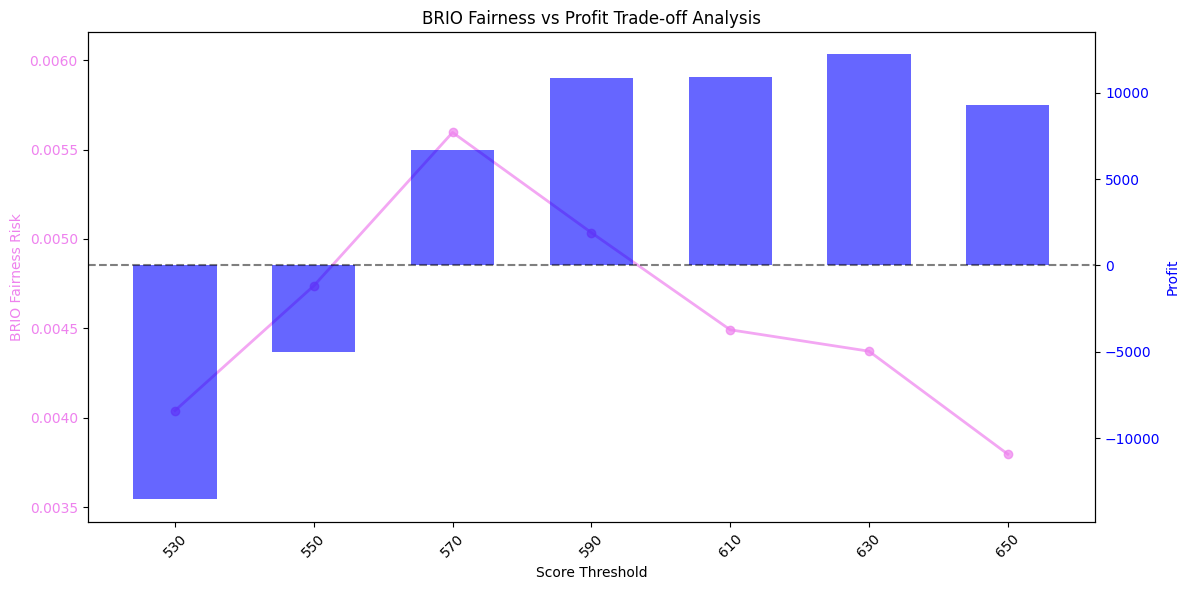


=== KEY INSIGHTS  ===
Best fairness threshold: 650 (fairness risk: 0.0038)
Best profit threshold: 630 (profit: 12274)
Fairness-Profit correlation: 0.204

Fairness tracker array: [np.float64(0.00404046520982895), np.float64(0.004738156154781556), np.float64(0.005595675078232116), np.float64(0.005035447477137825), np.float64(0.0044925292570943244), np.float64(0.0043727457882910435), np.float64(0.003797316529150016)]
Analysis complete!


In [11]:
# -----------------------------------------------------------------------------
# DISPLAY RESULTS SUMMARY
# -----------------------------------------------------------------------------
print("\n=== FAIRNESS-PROFIT TRADE-OFF SUMMARY ===")
print("Threshold | Profit   | Fairness Tracker")
print("-" * 40)
for i, result in enumerate(results_enhanced[:-1]):  # Exclude last value
    print(f"{result['class']:<9} | {result['profit']:<8.0f} | {fairness_tracker_evolution[i]:.4f}")

# -----------------------------------------------------------------------------
# ENHANCED VISUALIZATION WITH REAL BRIO SCORES
# -----------------------------------------------------------------------------
def plot_fairness_vs_profit_enhanced_no_last(results_df_dict, fairness_tracker_array,
                                            fairness_plot_lim=None, profit_plot_lim=None):
    """
    Enhanced visualization using real BRIO fairness scores
    """
    # Exclude first and last value from both arrays
    results_subset = results_df_dict[1:-1]
    fairness_subset = fairness_tracker_array[1:-1]

    if len(results_subset) == 0 or len(fairness_subset) == 0:
        print("Warning: No data to plot after excluding last value")
        return

    # Calculate profit values for plot limits
    profit_values = [r['profit'] for r in results_subset]

    if profit_plot_lim is None:
        profit_plot_lim = [min(profit_values) * 1.1, max(profit_values) * 1.1]
    if fairness_plot_lim is None:
        if len(fairness_subset) > 0 and min(fairness_subset) != max(fairness_subset):
            fairness_plot_lim = [min(fairness_subset) * 0.9, max(fairness_subset) * 1.1]
        else:
            fairness_plot_lim = [0, 1]  # Default range if all values are the same

    _df_results = pd.DataFrame(results_subset)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # LEFT AXIS: Real BRIO fairness scores
    color = 'violet'
    ax1.set_xlabel('Score Threshold')
    ax1.set_ylabel('BRIO Fairness Risk', color=color)
    ax1.plot(range(len(fairness_subset)), fairness_subset,
             color=color, marker='o', linewidth=2, markersize=6, alpha=0.7)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(fairness_plot_lim[0], fairness_plot_lim[1])

    # Set x-axis labels
    ax1.set_xticks(range(len(_df_results)))
    ax1.set_xticklabels(_df_results['class'], rotation=45)

    # RIGHT AXIS: Profit bars
    ax2 = ax1.twinx()
    color = 'blue'
    ax2.set_ylabel('Profit', color=color)
    ax2.bar(range(len(_df_results)), _df_results['profit'],
            color=color, alpha=0.6, width=0.6)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(profit_plot_lim[0], profit_plot_lim[1])
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)

    plt.title('BRIO Fairness vs Profit Trade-off Analysis')
    plt.tight_layout()
    plt.show()

# Create enhanced visualization excluding the last value
plot_fairness_vs_profit_enhanced_no_last(
    results_enhanced,
    fairness_tracker_evolution
)

# -----------------------------------------------------------------------------
# ANALYSIS INSIGHTS
# -----------------------------------------------------------------------------
print("\n=== KEY INSIGHTS  ===")

# Work with subsets excluding the last value
results_subset = results_enhanced[1:-1]
fairness_subset = fairness_tracker_evolution[1:-1]

if len(results_subset) > 0 and len(fairness_subset) > 0:
    best_fairness_idx = fairness_subset.index(min(fairness_subset))
    best_profit_idx = max(range(len(results_subset)), key=lambda i: results_subset[i]['profit'])

    print(f"Best fairness threshold: {results_subset[best_fairness_idx]['class']} "
          f"(fairness risk: {fairness_subset[best_fairness_idx]:.4f})")
    print(f"Best profit threshold: {results_subset[best_profit_idx]['class']} "
          f"(profit: {results_subset[best_profit_idx]['profit']:.0f})")

    # Calculate correlation between fairness and profit (excluding last value)
    profit_values_subset = [r['profit'] for r in results_subset]
    if len(fairness_subset) > 1 and len(profit_values_subset) > 1:
        correlation = np.corrcoef(fairness_subset, profit_values_subset)[0, 1]
        print(f"Fairness-Profit correlation: {correlation:.3f}")
    else:
        print("Not enough data points for correlation calculation")

    print(f"\nFairness tracker array: {fairness_subset}")
else:
    print("No data available after excluding last value")

print("Analysis complete!")